<a href="https://colab.research.google.com/github/LeoncioJC/MNIST-Sequential-Neural-Network/blob/master/MNIST_Keras_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**MNIST Sequential Neural Network to Classify Images in Python with Keras**
by [Leoncio Jimenez Candia](https://www.linkedin.com/in/leoncio-r-jim%C3%A9nez-candia-64676416a)

![texto alternativo](https://www.pyimagesearch.com/wp-content/uploads/2019/02/fashion_mnist_header.png)

**Key words:** Image Recognition/Classification in Python with Keras, A Keras Sequential Neuronal Network Applied to a Fashion-MNIST Dataset.

In this article (written in python jupiter colab notebooks) we explain how to build a sequential neural network to classify grayscale images (28 pixels by 28 pixels) of fashion articles into ten (0 to 9) fashion categories (T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle Boot).

|ID|Label|
|:-------:|:-------:|
| 0 |T-shirt/top|
| 1 | Trouser  |
| 2 | Pullover|
| 3 | Dress   |
| 4 | Coat   |
| 5 | Sandal |
| 6 |  Shirt |
| 7 |  Sneaker |
| 8 |  Bag |
| 9 |Ankle Boot|

**[Colab Notebooks](https://https://colab.research.google.com/)**. Colaboratory is a Google research project created to help disseminate machine learning education and research. It's a Jupyter notebook environment that requires no setup to use and runs entirely in the cloud. 

To understand sequential neural networks with Keras and the fashion-mnist problem watch this video.

In [0]:
%%HTML
<iframe width="640" height="360" src="https://www.youtube.com/embed/qEyEijUDOCA" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

A [**5 steps life-cycle for neural network models in Keras**](https://machinelearningmastery.com/5-step-life-cycle-neural-network-models-keras/) was apply to define, compile, fit, evaluate and make predictions.

![5 steps life-cycle for neural network models in Keras](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2016/07/5-Step-Life-Cycle-for-Neural-Network-Models-in-Keras.png)

Before to do that we need to load Keras and other libraries and the dataset.

###**Load Keras: The Python Deep Learning Library**

First, we import **[Keras](https://keras.io)**, Numpy, and Matplotlib.

In [0]:
import keras
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


###**Load Dataset of Fashion Articles (Fashion-MNIST) and Normalize the Data** 

Secondly, we need to load a dataset to train the neural network model and other dataset to test the model (evaluate the trained model and make predictions).

Fashion-MNIST is a database of a trainning dataset of 60,000 28x28-pixel images and a test dataset of 10,000 28x28-pixel images of ten (0 to 9) fashion categories (T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle Boot). 

We import **[Fashion-MNIST](https://keras.io/datasets/)** using two tuples. **(X_train, Y_train)** for the train dataset and **(X_test, Y_test)** for the test dataset:

**X_train:** Input data (60,000 images).

**Y_train:** Output data or Target data or Labeled data (10 categories).

**X_test:** Input data (10,000 images).

**Y_test:** Output data or Target data or Labeled data (10 categories).

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
label= ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]


4423680/4422102 [==============================] - 1s 0us/step


Let's check the **training dataset**, the **test dataset** and the **label** associated.

In [0]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

**X_train** and **X_test** containt 60,000 28x28-pixel images and 10,000 28x28-pixel images, respectively.

So we have 60,000 images 28X28 pixels to train our neural network model and 10,000 images 28X28 pixels to test it.

Each image is identify by an index (integers in range 0-59999 train dataset and 0-9999 test dataset) and a matrix 28 rows and 28 columms with a number 0 to 255 to indicate the numbers of pixels.

In other words, **X_train** is an array size 60,000 with a matrix 28X28 inside. Same thing to **X_test** but the size is 10,000. As we can see below:

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

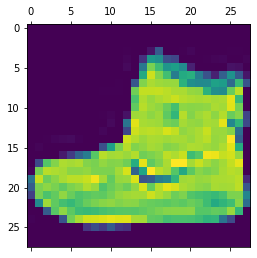

In [0]:
x_train[0], plt.matshow(x_train[0]), label[y_train[0]]

**X_train[0]** contains 28 rows and 28 columms with a number 0 to 255 (pixels) that represent the first image (an **Ankle Boot**) of our train dataset. 

As you can see below **X_train[0][24]** is an array (row 24 of X_train[0]) and **X_train[0][24][4]** is a number (the grayscale digit of row 24 and the column 4 of the image X_train[0]).

In [0]:
x_train[0][24]

array([  2,   0,   0,   0,  66, 200, 222, 237, 239, 242, 246, 243, 244,
       221, 220, 193, 191, 179, 182, 182, 181, 176, 166, 168,  99,  58,
         0,   0], dtype=uint8)

In [0]:
x_train[0][24][4]

66

Let's see the labels **Y_train** and **Y_test**.

In [0]:
y_train, y_test

(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8),
 array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

The data labels (integers in range 0-9) are arrays the size 60,000 and 10,000, respectively.

Let's see others images and labels of our training dataset.

(<matplotlib.image.AxesImage at 0x7f7a9afe05f8>,
 0,
 'T-shirt/top',
 0,
 'T-shirt/top',
 0,
 'T-shirt/top',
 5,
 'Sandal')

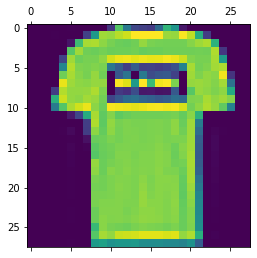

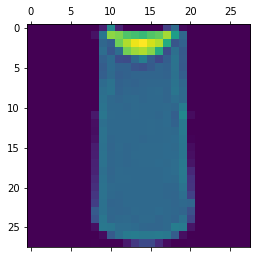

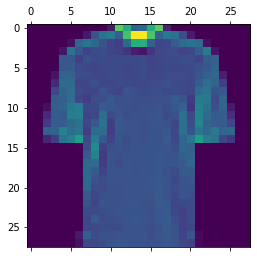

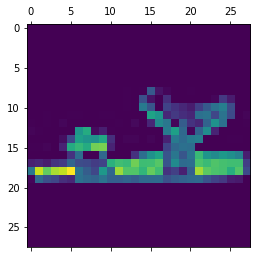

In [0]:
plt.matshow(x_train[1]), y_train[1], label[y_train[1]], plt.matshow(x_train[2]), y_train[2], label[y_train[2]], plt.matshow(x_train[59998]), y_train[59998], label[y_train[59998]], plt.matshow(x_train[59999]), y_train[59999], label[y_train[59999]]

So **X_train[1]** is a T-shirt/top, **X_train[2]** is a T-shirt/top, **X_train[59998]** is a T-shirt/top, and **X_train[59999]** is a Sandal. 

Now let's see somes images and labels of our test dataset: **X_test[0]**, **X_test[1]**, **X_test[2]**, and **X_test[9999]**. 

(<matplotlib.image.AxesImage at 0x7f7a9ae61cf8>,
 9,
 'Ankle Boot',
 2,
 'Pullover',
 1,
 'Trouser',
 5,
 'Sandal')

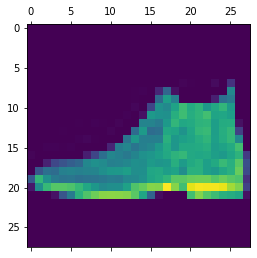

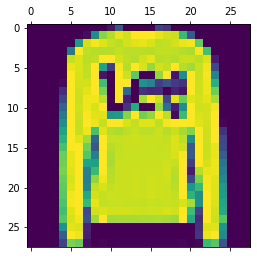

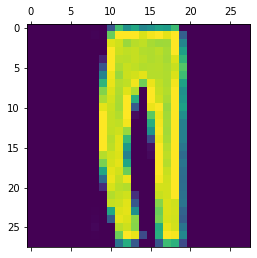

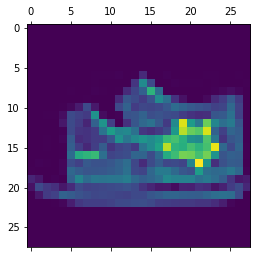

In [0]:
plt.matshow(x_test[0]), y_test[0], label[y_test[0]], plt.matshow(x_test[1]), y_test[1], label[y_test[1]], plt.matshow(x_test[2]), y_test[2], label[y_test[2]], plt.matshow(x_test[9999]), y_test[9999], label[y_test[9999]]

So **X_test[0]** is an Ankle Boot, **X_test[1]** is a Pullover, **X_test[2]** is a Trouser, and **X_test[9999]** is a Sandal.

**Normalize the Data**

**[Normalization](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** is a technique used to change the values of an array to a common scale, without distorting differences in the ranges of values. Normalize the data (image) means dividing by 255 (the max grayscale digit) the training and test dataset.

In [0]:
x_train=x_train/255

In [0]:
x_test=x_test/255

(array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

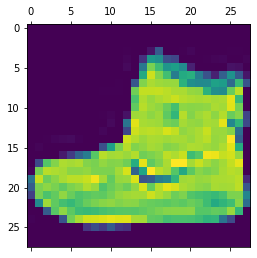

In [0]:
x_train[0], plt.matshow(x_train[0])

###**Step 1. Define Network**

The purpose of this step is to define a model architecture (numbers of hidden layers, hidden neurons, activation function, etc). In other words the parameters of the model. 

The **[sequential model](https://keras.io/getting-started/sequential-model-guide/)** is a linear stack of layers.

Keras can create a model by passing a list of layers using the method **add( )**.

In [0]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(20, activation="relu"))
model.add(Dense(10, activation="softmax"))

Our sequential neuronal model contains 3 layers (Input, Hidden, Output) of neurons (a node or unit that contains a number). The input neurons are connected to the output neurons via a hidden neurons. See the **[figure below](https://github.com/codebasics/py/blob/master/DeepLearningML/1_keras_fashion_mnist_neural_net/1_keras_fashion_mnist.ipynb)**.


![texto alternativo](https://github.com/codebasics/py/raw/5e7277f380fe9daba8f7ece4f25d1177ca1e63d1/DeepLearningML/1_keras_fashion_mnist_neural_net/fashion_neural_net.png)

The **first layer** represent the **Input**. In our model the input is X_train (60000, 28, 28) images. So we need 784=28X28 input neurons in the first layer. In other words, each images (a matrix of 28 rows and 28 columns) is charge in this 784 input neurons. Keras use the method Flatten( ) to convert a matrix 28X28 in an array size 784. The method Flatten is used to flatten the input.

The **second layer** represent the **Hidden** neurons. The method Dense( ) is used to define the numbers of neurons of the Hidden layer and the type of the activation function of the model. We can use any number of neurons and layers on the Hidden layers. The configuration (architecture) of the model define the quality of the learning process. Let's start with 20 neurons and 1 hidden layer.

The **third layer** represent the **Output** neurons. In our model the output are the labels Y_train. So we need 10 neurons, one for each 10 fashion categories (T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle Boot), respectively. 

The activation function in the Hidden layer is Relu and in the Output layer is Softmax beacause the neural network try to solve a classification problem.

Keras use the method model.summary() to check the model.

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                15700     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
_________________________________________________________________


So we have an Input layer of 784 neurons. A Hidden layer of 20 neurons. And an Output of layer 10 neurons. 

A total of (15,910 = 15,700 + 210) learnable parameters (weights and biases) of our trainig model to estimate.

Hidden layer 15,700 = 784 X 20 (weights) + 20 (biases), Output layer 210 = 20 X 10 (weights) + 20 (biases) by minimizing a **loss function** using an **optimizer** (gradient descent algorithm) that depends only on training dataset. We want to find the neural network weights that achieve the lowest loss.

Keras computing the **values of weights and biases** automatically during training process watch the **[tensorflow animation](https://playground.tensorflow.org/)** below minute 20:05. 

In [0]:
%%HTML
<iframe width="640" height="360" src="https://www.youtube.com/embed/7x2YZhEj9Dw" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

###**Step 2. Compile Network**

The purpose of this step is to configure the learning process. In other words to  find the neural network weights and biases that achieve the lowest loss incurred from incorrect predictions. 

Keras use the method **[model.compile](https://keras.io/getting-started/sequential-model-guide/#compilation)** with three arguments:


**[Loss](https://keras.io/losses/)** is a loss function (or objective function, or optimization score function, or error function). Loss measures the cost incurred from incorrect predictions. The empirical loss measures the total loss of our entire dataset. Exemple: loss='mean_squared_error'. 

**[Optimizer](https://keras.io/optimizers/)** is a gradient function used to optimize the loss functions. Exemple: optimizer='SGD'. Stochastic Gradient Descent optimizer. 

**[Metrics](https://keras.io/metrics/)** is a mesure used to judge the performance of a training model to make good predictions. Exemple: metrics='accurancy'. Accurancy is the number of correct predictions dividing by the number of predictions (our entire dataset).

Loss is a number (the minimum score or value of our loss function) and accuracy(acc) is a %. Their values are calculated when the model is training (Step 3).


In [0]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

The type of loss, optimizer and metrics depend on the problem that the training model is trying to solve. To a classification problem sparse categorical cross-entropy, adam and accuracy are use it.

###**Step 3. Fit Network**

The purpose of this step is to fit the Input (images) into the Output (labels) during the learning process. In other words to make corrrect predictions by estimated the values of the parameters of the training model. The quality of the learning process consist on the training loss values and metrics values at successive epochs.

Keras use the method **[model.fit](https://keras.io/models/model/#fit)** with three arguments: 

**X_train:** Input data (60000 images).

**Y_train:** Output or Target data (10 labels).

**Epochs:** Number of episode of training the neural network model over and over again with the training dataset.

Once training process is complet Keras provides a statistical summary of the performance of the model during training. 

The values of **loss** and **acc** are used to give the statistical results. Loss is a number give by the loss function. So it has to be near 0 for good predictions.

We use Keras **[training history visualization](https://keras.io/visualization/)** to plot **loss** and **acc**. 

Epoch 1/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.3534 - acc: 0.8737
Epoch 2/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.3471 - acc: 0.8746
Epoch 3/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.3403 - acc: 0.8776
Epoch 4/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.3373 - acc: 0.8774
Epoch 5/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.3331 - acc: 0.8799
Epoch 6/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.3290 - acc: 0.8813
Epoch 7/10
60000/60000 [==============================] - 3s 46us/step - loss: 0.3255 - acc: 0.8827
Epoch 8/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.3241 - acc: 0.8830
Epoch 9/10
60000/60000 [==============================] - 3s 45us/step - loss: 0.3219 - acc: 0.8840
Epoch 10/10
60000/60000 [==============================] - 3s 44us/step - loss: 0.3184 - acc: 0.8840

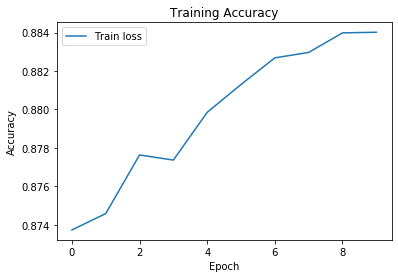

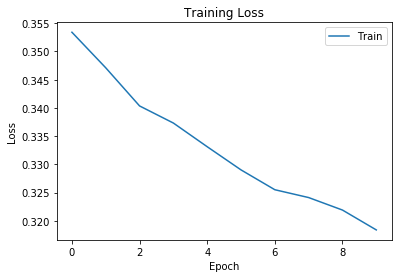

In [0]:
history = model.fit(x_train, y_train, epochs=10)

plt.plot(history.history['acc']) 
plt.title('Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train loss'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

As we can see the loss is decreasing and the acc is increasing. And after 10 epochs the training model accuracy is 88% (acc = 0.8840) and the training model loss is 0.3184. 

###**Step 4. Evaluate Network**

The purporse of this step is to evaluate a trained model (step 3) to make predictions. 

Keras used the method **[model.evaluate](https://keras.io/models/sequential/#evaluate)** with two arguments: 

**X_test:** Input data (10000 images). 

**Y_test:** Output or Target data (10 labels). 



In [0]:
Test_loss, Test_acc = model.evaluate(x_test, y_test)
print("Test loss:",Test_loss, "Test_acc:", Test_acc)

10000/10000 [==============================] - 0s 29us/step
Test loss: 0.3840790108680725 Test_acc: 0.8647


To differentiate **loss** and **acc** from the evaluation process we use test_loss (or val_loss) and test_acc (or val_acc). The performance of our training model is good to make predictions. The loss function is near a minimum (training loss is 0.3134 and test_loss is 0.3840). The training accuracy (acc) is 88% (60,000 images) and test accuracy (test_acc) or validation accuracy (val_acc) is 86% (10,000 images).

###**Step 5. Make Predictions**

The purporse of this step is to make predictions using an evaluated model (step 4).  

Keras use the method **[model.predict](https://keras.io/models/model/#predict)** with one argument: 

**X_test** (Input data, 10000 images)

The predictions are probabilities because we deal with a classification problem and the activation function of the Output layer is softmax.

In [0]:

yp = model.predict(x_test)

Let's see the shape.

In [0]:
yp.shape

(10000, 10)

We have 10,000 images and 10 labels.

In [0]:
yp

array([[1.7919614e-06, 2.5404270e-07, 1.4053868e-10, ..., 5.7137515e-03,
        7.7611359e-05, 9.6021408e-01],
       [6.2956395e-05, 6.6250394e-08, 8.9211708e-01, ..., 1.9890255e-32,
        9.9820738e-07, 8.1651601e-32],
       [1.2306125e-06, 9.9999833e-01, 3.1676964e-10, ..., 2.7565862e-18,
        1.9660582e-09, 2.2732934e-24],
       ...,
       [1.0030856e-03, 5.7134907e-06, 5.8409555e-06, ..., 1.2754618e-11,
        9.9716115e-01, 5.8495640e-13],
       [2.9068199e-08, 9.9998224e-01, 7.7781073e-11, ..., 2.5608838e-12,
        8.8536319e-07, 6.3850630e-19],
       [2.1287635e-06, 3.8911585e-06, 5.5861515e-06, ..., 4.6514529e-03,
        1.1712221e-03, 3.7520193e-05]], dtype=float32)

The predicted value (yp array) for each image (10,000) is a probaility (between 0 and 1) to be one of the 10 labels. Let's see the probabilities of the first image of our test dataset. 

In [0]:
yp[0]

array([1.7919614e-06, 2.5404270e-07, 1.4053868e-10, 1.0941562e-12,
       2.5597291e-09, 3.3992495e-02, 9.3957751e-11, 5.7137515e-03,
       7.7611359e-05, 9.6021408e-01], dtype=float32)

As you can see the probability close to 1 is 9.6021408e-01. Keras use the method **np.argmax( )** to pick up the bigest one.

In [0]:
np.argmax(yp[0]), label[np.argmax(yp[0])]

(9, 'Ankle Boot')

Now we compare the predicted value to the real value.

In [0]:
y_test[0],label[y_test[0]]

(9, 'Ankle Boot')

So the prediction is correct.

###**Investigating Our Predictions**

First of all, let's check the Accurancy (number of correct predictions dividing by the number of predictions). We need to change our test dataset for our train dataset.

In [0]:
yp = model.predict(x_train)
j = 0
k = 0
for i in range(60000):
    if y_train[i]== np.argmax(yp[i]):
      j=j+1                         
    else:
        k=k+1
print("Correct Predictions:", j) 
print("Jncorrect Predictions:", k)
print("Total:", j+k) 
print("Accuracy (acc)", j/60000)

Correct Predictions: 53375
Jncorrect Predictions: 6625
Total: 60000
Accuracy (acc) 0.8895833333333333


The accuracy value is the same 88%.

Secondly, let's check the validation accuracy and see all the incorrect predictions of our test dataset. The actual value and the predicted value is listed below.

In [0]:
yp = model.predict(x_test)
j = 0
k = 0
for i in range(0,10000):
    if y_test[i]== np.argmax(yp[i]):
      j=j+1                         
    else:
         print(i,y_test[i], label[y_test[i]],np.argmax(yp[i]), label[np.argmax(yp[i])])
         k=k+1
print("------------------------------")
print("Correct Predictions:", j) 
print("Incorrect Predictions:", k)
print("Total:", j+k) 
print("Test Accuracy (Test_acc):", j/10000) 


12 7 Sneaker 8 Bag
17 4 Coat 2 Pullover
25 4 Coat 2 Pullover
29 3 Dress 4 Coat
40 6 Shirt 0 T-shirt/top
42 3 Dress 6 Shirt
49 2 Pullover 6 Shirt
50 4 Coat 6 Shirt
51 4 Coat 2 Pullover
57 4 Coat 2 Pullover
66 2 Pullover 0 T-shirt/top
67 3 Dress 4 Coat
68 9 Ankle Boot 7 Sneaker
72 2 Pullover 6 Shirt
89 6 Shirt 2 Pullover
103 2 Pullover 6 Shirt
107 9 Ankle Boot 7 Sneaker
127 4 Coat 2 Pullover
135 6 Shirt 4 Coat
141 0 T-shirt/top 6 Shirt
147 6 Shirt 3 Dress
150 4 Coat 3 Dress
151 4 Coat 2 Pullover
153 4 Coat 3 Dress
192 1 Trouser 3 Dress
222 2 Pullover 3 Dress
227 2 Pullover 6 Shirt
239 4 Coat 2 Pullover
244 6 Shirt 2 Pullover
247 4 Coat 2 Pullover
248 2 Pullover 6 Shirt
249 2 Pullover 4 Coat
255 2 Pullover 4 Coat
273 2 Pullover 4 Coat
282 6 Shirt 2 Pullover
283 3 Dress 4 Coat
312 6 Shirt 8 Bag
313 4 Coat 6 Shirt
314 2 Pullover 6 Shirt
316 9 Ankle Boot 7 Sneaker
320 8 Bag 2 Pullover
324 4 Coat 6 Shirt
325 6 Shirt 2 Pullover
332 0 T-shirt/top 6 Shirt
344 6 Shirt 0 T-shirt/top
359 0 T-shirt/

The Test (or validation) accuracy value is the same 86%.

For the test image 7876 the actual value is a trouser and the predicted value is a coat.

7876 1 Trouser 4 Coat


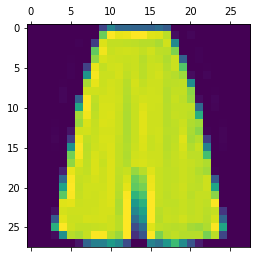

In [0]:
i = 7876
print(i,y_test[i],label[y_test[i]],np.argmax(yp[i]), label[np.argmax(yp[i])])
plt.matshow(x_test[i]) 

In [0]:
yp[7876], np.argmax(yp[7876])

(array([2.4940384e-06, 1.7730294e-03, 3.8831073e-03, 2.0360458e-05,
        9.9409252e-01, 1.8726348e-13, 2.8071597e-06, 1.5019211e-23,
        2.2576220e-04, 8.6841289e-25], dtype=float32), 4)

The probability to be a coat is 0.99, but it's a trouser.

For the test image 9985 the actual value is a pullover and the predicted value is a dress.

9985 2 Pullover 3 Dress


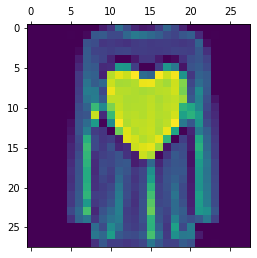

In [0]:
i = 9985
print(i,y_test[i],label[y_test[i]],np.argmax(yp[i]), label[np.argmax(yp[i])])
plt.matshow(x_test[i]) 

In [0]:
yp[9985], np.argmax(yp[9985])

(array([1.6742468e-01, 5.8819342e-02, 1.0774057e-01, 3.4243628e-01,
        8.5564971e-02, 1.4061854e-03, 2.2513825e-01, 1.5683999e-04,
        1.0393663e-02, 9.1934460e-04], dtype=float32), 3)

The probability to be a dress is 0.34, but it's a pullover.

###**Sites**

**[fast.ai Making neural nets uncool again](https://www.fast.ai/)**

**[Scale.ai: The Data Platform for AI. High quality training and validation data for AI applications](https://scale.com/)**

###**Books**

**[Machine Learning for Finance: Principles and practice for financial by Jannes Klaas](https://books.google.cl/books?id=qfeaDwAAQBAJ&pg=PA78&lpg=PA78&dq=We%C2%B4ve+using+a+Dataset+of+60,000+28x28&source=bl&ots=b6G0rl3q7i&sig=ACfU3U3jJkY3s_wtG1X0mO2TyeTXa5-T-g&hl=es&sa=X&ved=2ahUKEwiZgZLqhbbnAhVFD7kGHe9hBtgQ6AEwAHoECAUQAQ#v=onepage&q=We%C2%B4ve%20using%20a%20Dataset%20of%2060%2C000%2028x28&f=false)**

###**Papers**

**[5 Step Life-Cycle for Neural Network Models in Keras by Jason Brownlee](https://machinelearningmastery.com/5-step-life-cycle-neural-network-models-keras/)**

**[Activation functions and it’s types-Which is better? by Anish Singh Walia](https://towardsdatascience.com/activation-functions-and-its-types-which-is-better-a9a5310cc8f)**

**[Building A Deep Learning Model using Keras by Eijaz Allibhai](https://towardsdatascience.com/building-a-deep-learning-model-using-keras-1548ca149d37)** 

**[Building our first neural network in keras by Sanchit Tanwar](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** 


**[What do “compile” , “fit” and “predict” do in Keras sequential models?](https://datascience.stackexchange.com/questions/46124/what-do-compile-fit-and-predict-do-in-keras-sequential-models)**


**[Fashion MNIST with Keras and Deep Learning by Adrian Rosebrock](https://www.pyimagesearch.com/2019/02/11/fashion-mnist-with-keras-and-deep-learning/)** 


**[Keras for Beginners: Building Your First Neural Network by Victor Zhou](https://victorzhou.com/blog/keras-neural-network-tutorial/)** 

###**Videos**

In [0]:
%%HTML
<iframe width="640" height="360" src="https://www.youtube.com/embed/dNZXLH4xeAs" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [0]:
%%HTML
<iframe width="640" height="360" src="https://www.youtube.com/embed/2ePf9rue1Ao" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [0]:
%%HTML
<iframe width="640" height="360" src="https://www.youtube.com/embed/00xLZuxTzQc" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [0]:
%%HTML
<iframe width="640" height="360" src="https://www.youtube.com/embed/WQt4H1Bo0jM" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [0]:
%%HTML
<iframe width="640" height="360" src="https://www.youtube.com/embed/T6WLIbOnkvQ" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [0]:
%%HTML
<iframe width="640" height="360" src="https://www.youtube.com/embed/pLPr4nJad4A" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [0]:
%%HTML
<iframe width="640" height="360" src="https://www.youtube.com/embed/hxpGzAb-pyc" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

MIT Introduction to Deep Learning 6.S191: Lecture 1
*New 2020 Edition*
Foundations of Deep Learning
Lecturer: Alexander Amini
January 2020

In [0]:
%%HTML
<iframe width="640" height="360" src="https://www.youtube.com/embed/njKP3FqW3Sk" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

MIT 6.034 Artificial Intelligence, Fall 2010
Instructor: Patrick Winston

In [0]:
%%HTML
<iframe width="640" height="360" src="https://www.youtube.com/embed/uXt8qF2Zzfo" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

MIT 6.034 Artificial Intelligence, Fall 2010.
Instructor: Patrick Winston

In [0]:
%%HTML
<iframe width="640" height="360" src="https://www.youtube.com/embed/VrMHA3yX_QI" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

An updated deep learning introduction using Python, TensorFlow, and Keras.

In [0]:
%%HTML
<iframe width="640" height="360" src="https://www.youtube.com/embed/wQ8BIBpya2k" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [0]:
%%HTML
<iframe width="640" height="360" src="https://www.youtube.com/embed/BR9h47Jtqyw" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

**Jeremy Howard CEO of fast.ai**, a research institute dedicated to making deep learning more accessible. 

In [0]:
%%HTML
<iframe width="500" height="235" src="https://www.youtube.com/embed/PV5uyTBvDi4" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

**Alexandr Wang  CEO of Scale.ai**, the Data Platform for AI.

In [0]:
%%HTML
<iframe width="640" height="360" src="https://www.youtube.com/embed/inP_07aO2MU" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

For nearly 40 years, **Geoff Hinton** has been trying to get computers to learn like people do, a quest almost everyone thought was crazy or at least hopeless - right up until the moment it revolutionized the field. In this Hello World video, Bloomberg Businessweek's Ashlee Vance meets **the Godfather of AI**.

In [0]:
%%HTML
<iframe width="640" height="360" src="https://www.youtube.com/embed/l9RWTMNnvi4" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>